### 1. Using Optimize to Test Analytic Solution of the Brachistochrone Curve

In [1]:
import numpy as np
from scipy.optimize import newton
from scipy.integrate import quad
import matplotlib.pyplot as plt

In [2]:
g = 9.81 #Acceleration due to gravity
x2, y2 = 1, 0.5 #final position

In [3]:
def cycloid(x2, y2, N=100):
    
    #The analytic solution of the Brachistochrone. Optimize should produce the same result, numerically

    #First find theta2 from (x2, y2) numerically (by Newton-Rapheson).
    def f(theta):
        return y2/x2 - (1-np.cos(theta))/(theta-np.sin(theta))
    theta2 = newton(f, np.pi/2)

    #The radius of the circle generating the cycloid.
    R = y2 / (1 - np.cos(theta2))

    theta = np.linspace(0, theta2, N)
    x = R * (theta - np.sin(theta))
    y = R * (1 - np.cos(theta))

    #The time of travel
    T = theta2 * np.sqrt(R / g)
    print('T(cycloid) = {:.3f}'.format(T))
    return x, y, T

In [5]:
def linear(x2, y2, N=100):

    #Linear pathway, to show the cycloid solution is faster by comparison
    
    m = y2 / x2
    x = np.linspace(0, x2, N)
    y = m*x

    # The time of travel
    T = np.sqrt(2*(1+m**2)/g/m * x2)
    print('T(linear) = {:.3f}'.format(T))
    return x, y, T

In [6]:
def circle(x2, y2, N=100):

    #Circular pathway, to show the cycloid solution is faster by comparison
    # Circle radius
    r = (x2**2 + y2**2)/2/x2

    def f(x):
        return np.sqrt(2*r*x - x**2)
    def fp(x):
        return (r-x)/f(x)

    x = np.linspace(0, x2, N)
    y = f(x)

    # Calcualte the time of travel by numerical integration.
    T = quad(func, 0, x2, args=(f, fp))[0]
    print('T(circle) = {:.3f}'.format(T))
    return x, y, T

In [7]:
def parabola(x2, y2, N=100):
    
    #Parabolic pathway, to show the cycloid solution is faster by comparison

    c = (y2/x2)**2

    def f(x):
        return np.sqrt(c*x)
    def fp(x):
        return c/2/f(x)

    x = np.linspace(0, x2, N)
    y = f(x)

    # Calcualte the time of travel by numerical integration.
    T = quad(func, 0, x2, args=(f, fp))[0]
    print('T(parabola) = {:.3f}'.format(T))
    return x, y, T

T(cycloid) = 0.570
T(circle) = 0.587
T(parabola) = 0.583
T(linear) = 0.714


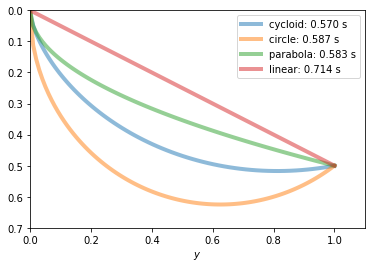

In [13]:
def func(x, f, fp):

    return np.sqrt((1+fp(x)**2) / (2 * g * f(x)))

fig, ax = plt.subplots()

for curve in ('cycloid', 'circle', 'parabola', 'linear'):
    x, y, T = globals()[curve](x2, y2)
    ax.plot(x, y, lw=4, alpha=0.5, label='{}: {:.3f} s'.format(curve, T))
ax.legend()

ax.set_xlabel('$x$')
ax.set_xlabel('$y$')
ax.set_xlim(0, 1.1)
ax.set_ylim(0.7, 0)
plt.savefig('brachistochrone_race.png')
plt.show()

### 2. Periodic Table Data Analysis



In [10]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import numpy as np
import seaborn as sns
 
PT = pd.read_excel('PeriodicTable.xlsx')
 
print("Column headings:")
print(PT.columns)

Column headings:
Index(['Atomic Number', 'Element', 'Symbol', 'Atomic Weight', 'Period',
       'Group', 'Phase', 'Most Stable Crystal', 'Type', 'Ionic Radius',
       'Atomic Radius', 'Electronegativity', 'First Ionization Potential',
       'Density', 'Melting Point (K)', 'Boiling Point (K)', 'Isotopes',
       'Discoverer', 'Year of Discovery', 'Specific Heat Capacity',
       'Electron Configuration', 'Display Row', 'Display Column'],
      dtype='object')


In [11]:
for i in PT.index:
    AN=np.array(PT['Atomic Number'])

In [67]:
for i in PT.index:
    GN=np.array(PT['Group'])

In [13]:
for i in PT.index:
    IR=np.array(PT['Ionic Radius'])

In [72]:
for i in PT.index:
    AW=np.array(PT['Atomic Weight'])

In [40]:
for i in PT.index:
    FI=np.array(PT['First Ionization Potential'])

In [44]:
for i in PT.index:
    MP=np.array(PT['Melting Point (K)'])

In [62]:
for i in PT.index:
    IS=np.array(PT['Isotopes'])

In [82]:
for i in PT.index:
    AR=np.array(PT['Atomic Radius'])

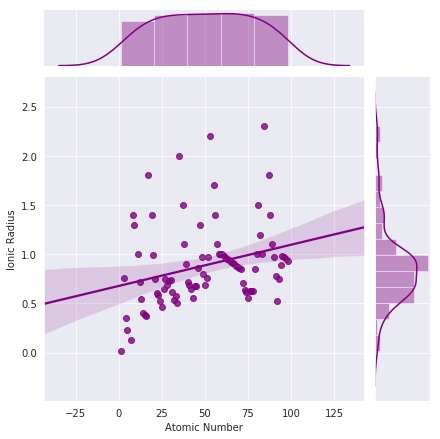

In [74]:
with sns.axes_style('darkgrid'):
    sns.jointplot(AN, IR, kind='reg', color='purple')
    plt.xlabel('Atomic Number')
    plt.ylabel('Ionic Radius')

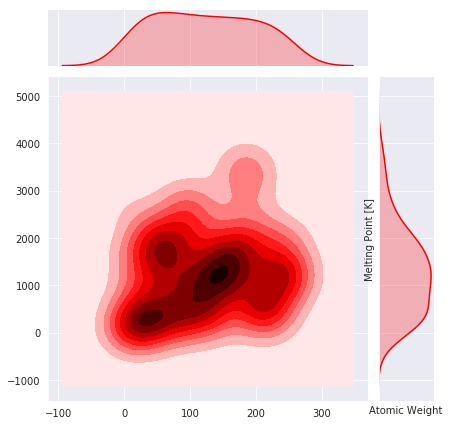

In [76]:
with sns.axes_style('darkgrid'):
    sns.jointplot(AW, MP, kind='kde', color='red')
    plt.xlabel('Atomic Weight')
    plt.ylabel('Melting Point [K]')
    

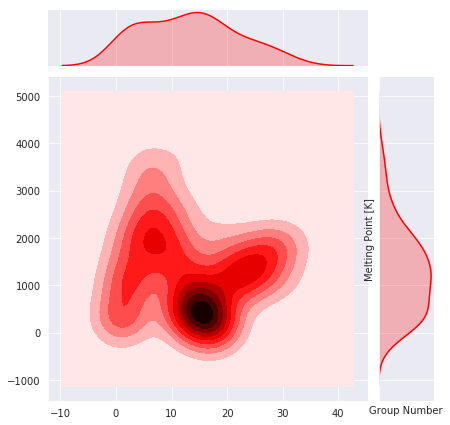

In [71]:
with sns.axes_style('darkgrid'):
    sns.jointplot(GN, MP, kind='kde', color='red')
    plt.xlabel('Group Number')
    plt.ylabel('Melting Point [K]')
    

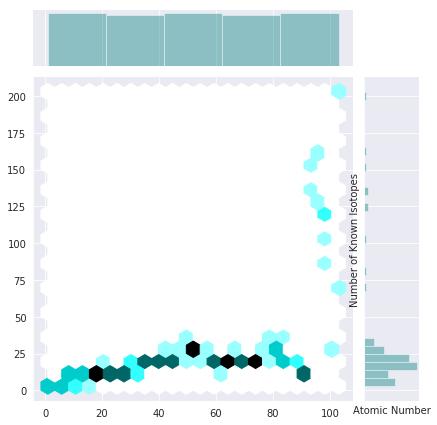

In [80]:
with sns.axes_style('darkgrid'):
    sns.jointplot(AN, IS, kind='hex', color='teal')
    plt.xlabel('Atomic Number')
    plt.ylabel('Number of Known Isotopes')

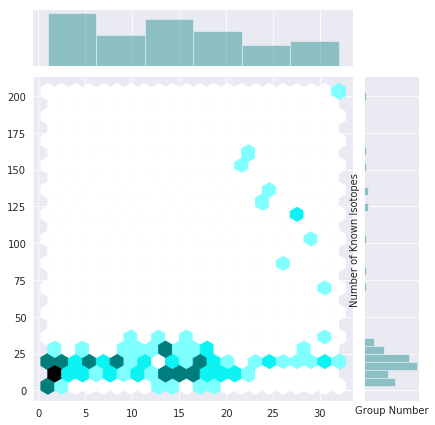

In [81]:
with sns.axes_style('darkgrid'):
    sns.jointplot(GN, IS, kind='hex', color='teal')
    plt.xlabel('Group Number')
    plt.ylabel('Number of Known Isotopes')

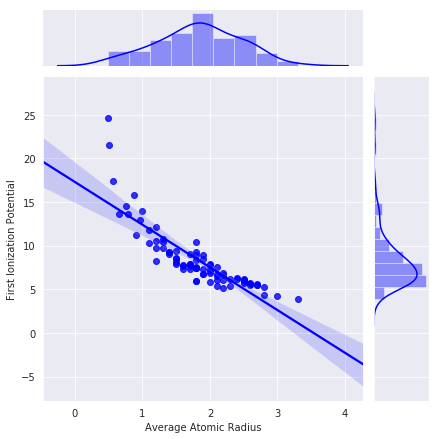

In [86]:
with sns.axes_style('darkgrid'):
    sns.jointplot(AR, FI, kind='reg', color='blue')
    plt.xlabel('Average Atomic Radius')
    plt.ylabel('First Ionization Potential')